# **Advanced Machine Learning Analysis for Marketing**


Hello everyone! My name is Ignacio Antequera Sanchez and this project aims to explore Advanced Machine Learning techniques for analyzing retail data based on three years of sales data across 45 stores situated in diverse regions, each comprising multiple departments.

One of the primary challenges in modeling retail data stems from the necessity to make informed decisions in the face of limited data availability. Notably, sales surge during holidays and significant events, offering opportunities to evaluate the consequences of strategic choices on the overall performance. Moreover, the implementation of discounts and promotions can significantly influence sales outcomes. The primary objective of this endeavor is to forecast the potential impacts on specific departments and their extents.

Consequently, the central objectives to address involve the utilization of sophisticated machine learning methodologies to:

1. Predict sales at the department level for each individual store.
2. Model the ramifications of markdowns during holiday weeks.
3. Generate actionable marketing recommendations based on derived insights, with a focus on prioritizing actions that yield the most substantial business impact.

## Agenda


This project involves the examination and prediction of store sales utilizing various techniques. We will begin by employing autocorrelation analysis to uncover time lag delays and subsequently adjust a dataset accordingly. A range of machine learning models will then be employed to forecast time series data, focusing on departmental weekly sales patterns.

Building upon neural network methodologies, we will explore the impact of markdowns on sales within the store, both during holiday periods and regular weeks. Subsequently, we will formulate a sales strategy tailored to a specific department.

The project can be broken down into the following stages:
1. Importing Libraries and Defining Auxiliary Functions
2. Data Downloading and Pre-processing
3. Predicting Department-wide Sales
   - Analysis of Previous Data
   - Creation of the Dataset
   - Data Normalization
   - Linear Regression
   - Back Propagation Neural Network
   - Long Short-Term Memory (LSTM)
4. Modeling the Effects of Markdowns on Holiday Weeks
   - Initial Analysis
   - Linear Regression
   - Back Propagation Neural Network
   - Sensitivity Analysis
5. Recommendations
6. Final Reflection and Comments

The statistical data was sourced from the website https://www.kaggle.com/manjeetsingh/retaildataset. This dataset is made available under the CC BY-IGO license, which grants the freedom to copy, adapt, distribute, and utilize the work, including for commercial purposes, without the need for explicit permission.

***

## Importing Libraries and Defining Auxiliary Functions


In [77]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scikeras  # Importing scikeras for using Keras models with scikit-learn API

# Import specific modules from libraries
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scikeras.wrappers import KerasClassifier, KerasRegressor  # Import Keras wrappers
from keras.models import Sequential
from keras.layers import Dense, Dropout  # Import layers for building neural networks
from keras.callbacks import EarlyStopping  # Import EarlyStopping for model training
from keras.layers import LSTM  # Import LSTM layer for time series analysis

## Data Downloading and Pre-processing

### Data Downloading

We will obtain retail data relevant to store, department, and regional operations concerning the designated dates. Additionally, we have included the CSV file within this repository. This ensures access remains convenient either as an alternative to the provided link or for easier future retrieval.

In [78]:
# Load the dataset from the specified URL into a DataFrame
df1 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0JKFEN/Features%20data%20set.csv', delimiter=',')

# Assign a name to the DataFrame to indicate the dataset
df1.dataframeName = 'Features data set.csv'

# Display the loaded DataFrame
df1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


Let's examine this dataset. As observed, the dataset comprises 8,190 rows and 12 columns, with each column representing the following attributes:

- Store: The store number.
- Date: The week of observation.
- Temperature: The average temperature within the region.
- Fuel_Price: The cost of fuel in the region.
- MarkDown1-5: Anonymized data pertaining to promotional markdowns. MarkDown data is available after November 2011 and is not consistently present for all stores. Missing values are indicated as NA.
- CPI: The consumer price index.
- Unemployment: The rate of unemployment.
- IsHoliday: Indicates whether the week corresponds to a special holiday period.

Moving forward, our next step involves downloading historical sales data that spans from February 5, 2010, to November 1, 2012.

In [79]:
# Load the sales dataset from the specified URL into a DataFrame
df2 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0JKFEN/sales%20data-set.csv', delimiter=',')

# Assign a name to the DataFrame to indicate the dataset
df2.dataframeName = 'Sales data set.csv'

# Display the loaded DataFrame
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


Observing the dataset, it comprises a total of 421,570 rows and encompasses 5 columns.

Contained within this dataset, you will encounter the subsequent information:

- Store: The specific store number.
- Dept: The designated department number.
- Date: The week under consideration.
- Weekly_Sales: The sales value corresponding to the specific department within the given store.
- IsHoliday: A flag indicating whether the week is designated as a special holiday week.

Lastly, the final dataset encapsulates anonymized details concerning the 45 stores, encompassing information about the store's type and size.

In [80]:
# Load the stores dataset from the specified URL into a DataFrame
df3 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0JKFEN/stores%20data-set.csv', delimiter=',')

# Assign a name to the DataFrame to indicate the dataset
df3.dataframeName = 'Stores data set.csv'

# Display the loaded DataFrame
df3

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


### Data Pre-processing


To begin with, our initial step involves merging these three datasets into a single entity using the  **[pandas.DataFrame.merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01)** function.


In [81]:
# Merge df1 with df3 based on the 'Store' column
df = df1.merge(df3, on='Store')

# Merge df2 with the previously merged DataFrame (df) based on 'Store', 'Date', and 'IsHoliday' columns
df = df2.merge(df, on=['Store', 'Date', 'IsHoliday'])

# Display the resulting merged DataFrame
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,26/10/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,26/10/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,26/10/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


Let's explore the dataset. As evident, the dataset comprises 421,570 rows and 16 columns. Notably, the dataset encompasses diverse information types. It's crucial to ensure that Python accurately identifies the appropriate data types.

In [82]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


To begin with, let's remove rows containing empty values:

In [83]:
# Fill missing values with zeros in the DataFrame
df = df.fillna(0)

As evident, we need to convert the 'Date' columns into DateTime format. Additionally, the 'Store' type needs to be categorized.

In [84]:
# Convert the 'Date' column to DateTime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert the 'Type' column to categorical data type
df['Type'] = df['Type'].astype('category')

# Display summary information about the DataFrame after transformations
df.info()

# - Ignore the warnings -

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  category      
 15  Size          421

C:\Users\nacho\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\nacho\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\nacho\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/03/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\nacho\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/03/2010' in DD/MM/YYYY format. Provide format or specif

Given that stores and their respective departments vary across categories, sizes, quantities, and product assortments, while also being situated in distinct city regions, it would be erroneous to train a neural network on the entire dataset. Since departments located in different parts of the city exhibit distinct sales patterns despite using the same input data, it's evident that each department's information carries its individual variance. Consequently, for the analysis, it's imperative to isolate departments and conduct separate analyses for each of them.

Next, we will group the rows based on 'Store,' 'Department,' and 'Date'.

In [85]:
# Group the DataFrame by 'Store,' 'Dept,' and 'Date,' and calculate the sum for each group
grouped_data = df.groupby(['Store', 'Dept', 'Date']).sum()

Let's calculate number of rows for each department:


In [86]:
# Count the occurrences of unique combinations of 'Store' and 'Dept' columns
value_counts = df[['Store', 'Dept']].value_counts()

Notice that the majority of departments consist of 143 rows each. We will now proceed to conduct an analysis for one of these departments.

In [87]:
# Assign the value 24 to the variable St (Store)
St = 24

# Assign the value 50 to the variable Dt (Department)
Dt = 50

Next, we will generate a dataset for Store: `St` and Department: `Dt`.

In [88]:
# Create a new DataFrame df_d by filtering rows where 'Store' is equal to St and 'Dept' is equal to Dt
df_d = df[(df['Store'] == St) & (df['Dept'] == Dt)]

# Display the new DataFrame containing data for Store: St and Department: Dt
df_d

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
226912,24,50,2010-05-02,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326,A,203819
226985,24,50,2010-12-02,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326,A,203819
227059,24,50,2010-02-19,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326,A,203819
227130,24,50,2010-02-26,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326,A,203819
227201,24,50,2010-05-03,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,A,203819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236783,24,50,2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,A,203819
236854,24,50,2012-05-10,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,A,203819
236926,24,50,2012-12-10,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,A,203819
236999,24,50,2012-10-19,1151.0,False,52.59,4.153,3446.70,0.00,101.00,111.46,5963.01,138.833613,8.693,A,203819


## Predict  Department-wide Sales 


### Analysis of Previous Data


We will now select the 'Weekly_Sales' field for our forecasting. To begin, let's visualize this data.

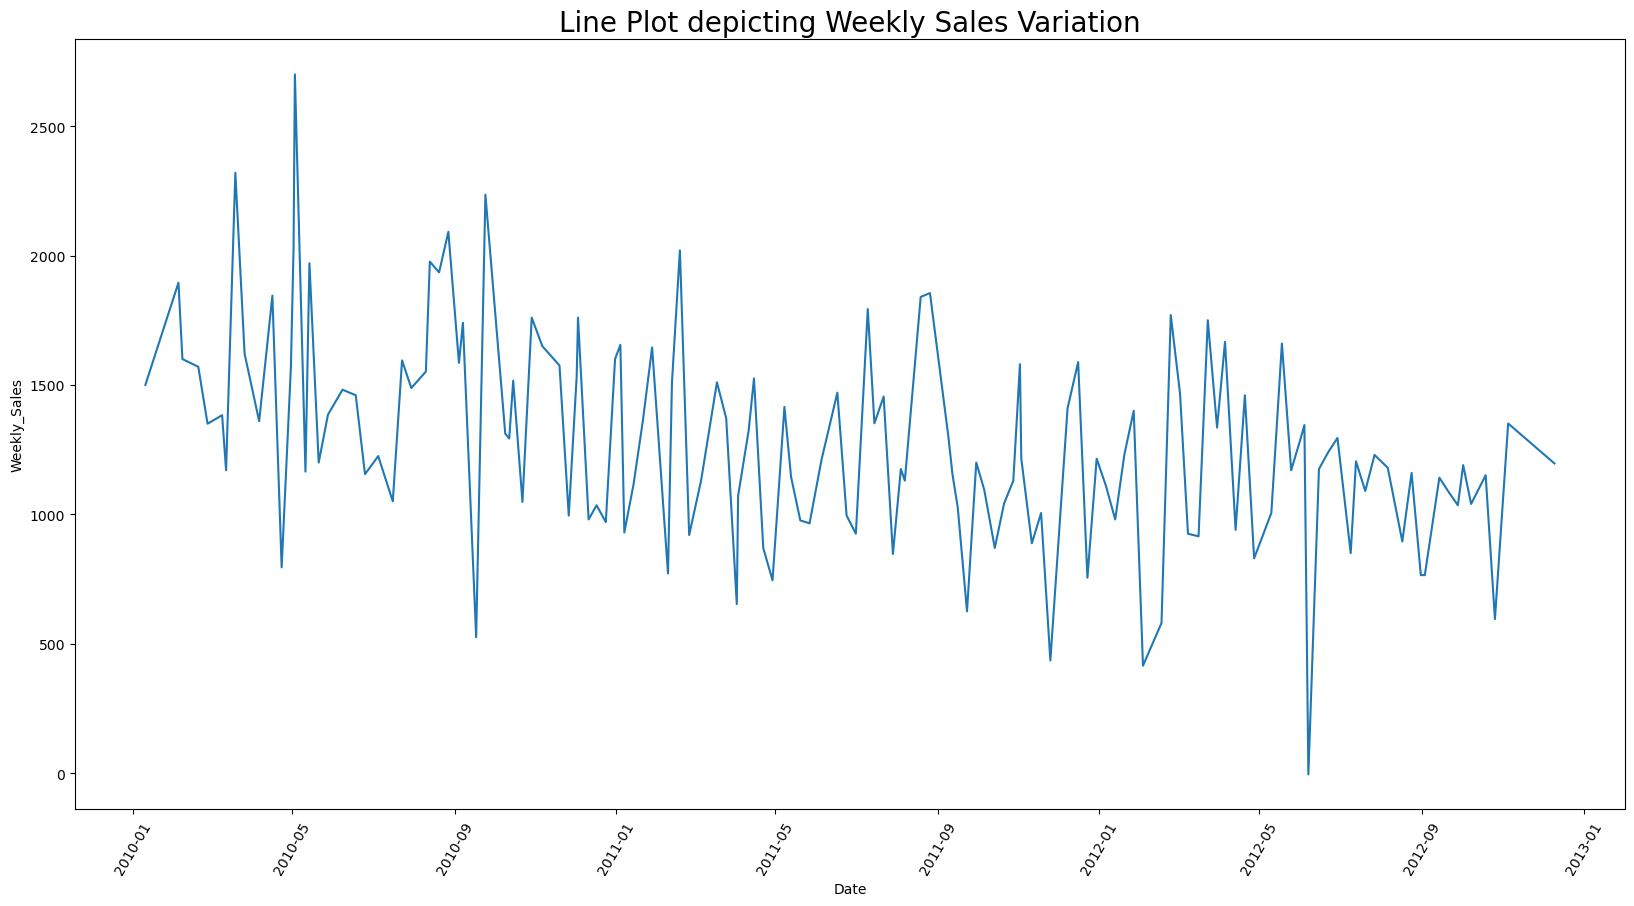

In [89]:
# Create a figure and subplots with a specified figsize
plt.figure(figsize=(20, 10))

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Create a line plot using Seaborn's lineplot function
_ = sns.lineplot(data=df_d, x='Date', y='Weekly_Sales')

# Set the title for the plot
_ = plt.title('Line Plot depicting Weekly Sales Variation', fontsize=20)

# Display the plot
plt.show()

Next, we will visualize the fluctuations in sales during holiday periods.

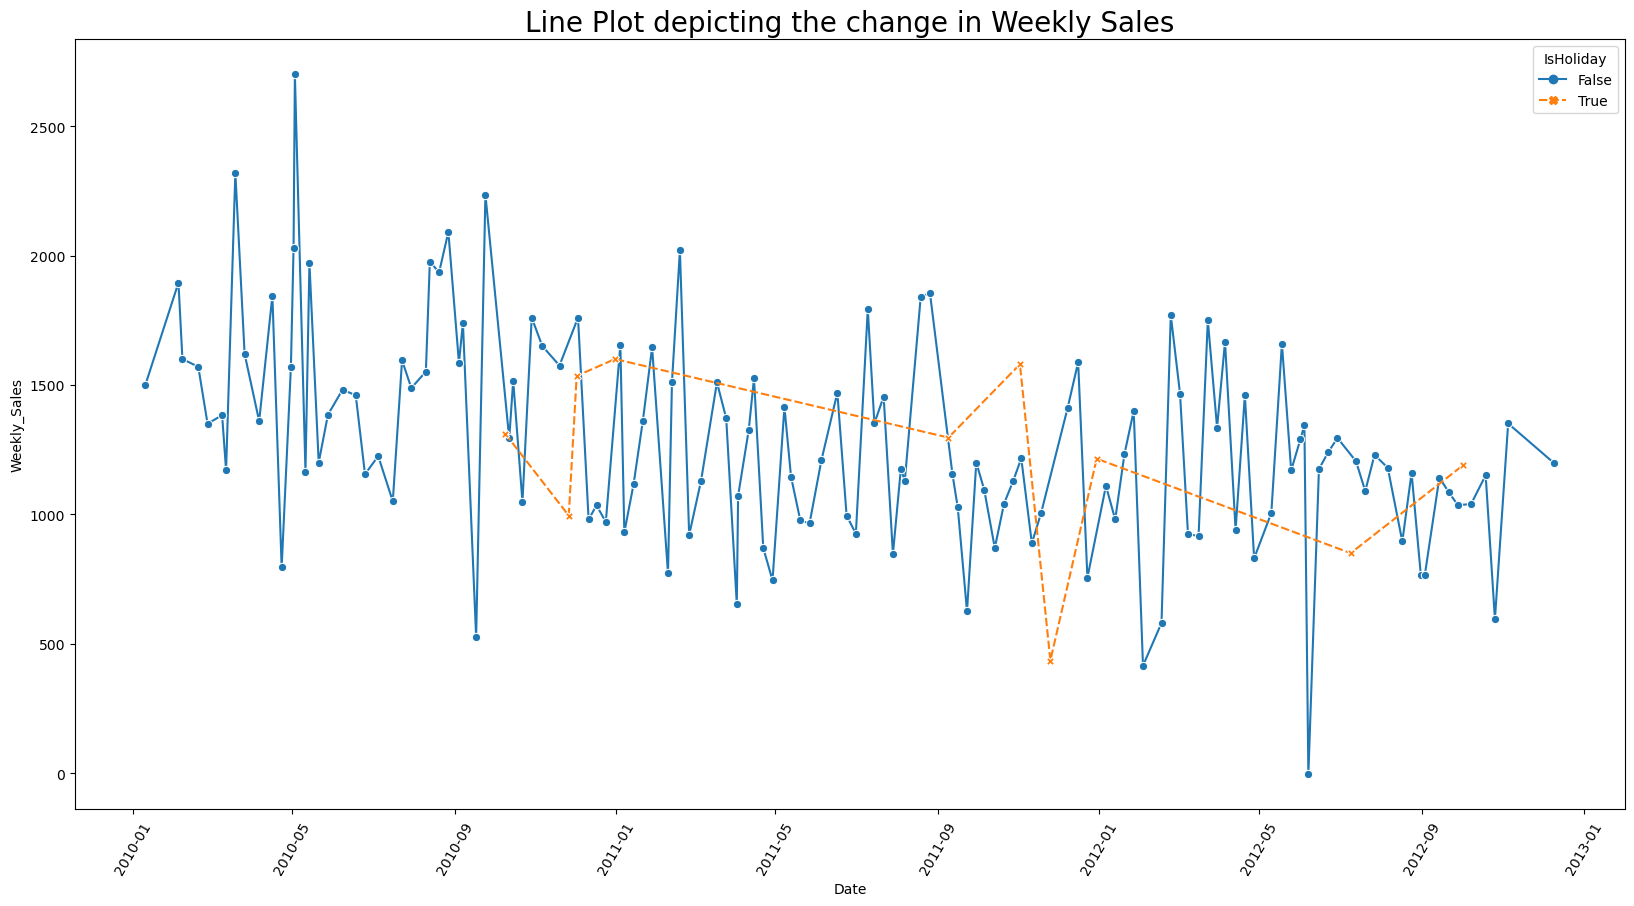

In [90]:
# Create a figure and subplots with a specified figsize
plt.figure(figsize=(20, 10))

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Create a line plot using Seaborn's lineplot function
_ = sns.lineplot(data=df_d, x='Date', y='Weekly_Sales', hue='IsHoliday', style='IsHoliday', markers=True, ci=68)

# Set the title for the plot
_ = plt.title('Line Plot depicting the change in Weekly Sales', fontsize=20)

# Display the plot
plt.show()

Observing the plot, it's evident that there isn't a sales increase during holidays.

The absence of a discernible sales increase during holidays, as depicted in our plot, suggests that holidays might not significantly impact the sales patterns for this particular department in Store St. This could be attributed to various factors, such as the department's product category or customer behavior. The plot's consistent trend across holiday and non-holiday periods indicates that the department's sales behavior remains relatively stable irrespective of holidays.

In order to forecast sales, we will generate an independent time series specifically comprising weekly sales data.

In [91]:
# Create a time series by extracting 'Date' and 'Weekly_Sales' columns from df_d
ts = df_d[['Date', 'Weekly_Sales']]

# Set the 'Date' column as the index for the time series
ts = ts.set_index('Date')

# Isolate the 'Weekly_Sales' data from the time series
ts = ts['Weekly_Sales']

When attempting to forecast a time series, our approach involves considering that today's data relies on values from preceding weeks. To assess these dependencies, conducting a correlation analysis becomes crucial. This process entails:

1. Duplicating the time series data and shifting it vertically downward by a designated number of days (lag).
2. Removing missing data generated by the vertical shift, which occurs due to (**[pandas.DataFrame.shift()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01)**)
3. Computing the correlation coefficient between the resultant series.

Given the necessity to perform this operation for various lag values, it's pragmatic to devise a dedicated function or utilize **[statsmodels.graphics.tsaplots.plot_acf()](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01)**. Alternatively, the [Partial Autocorrelation Function](https://en.wikipedia.org/wiki/Partial_autocorrelation_function?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01): (PACF) can be utilized using **[statsmodels.graphics.tsaplots.plot_pacf()](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01)**.

This analysis serves the purpose of identifying lag delays, indicating the number of weeks prior that influence today's sales, andcontributing significantly to our forecasting endeavors.

0     1.000000
1     0.130103
2     0.263880
3     0.136014
4     0.311210
5     0.126184
6     0.245963
7     0.088694
8     0.253053
9     0.071838
10    0.154257
Name: Correlation Coeff, dtype: float64
0     1.000000
1     0.131019
2     0.254831
3     0.086411
4     0.254782
5     0.043069
6     0.131390
7    -0.013168
8     0.127694
9    -0.028223
10    0.000674
Name: Partial Correlation Coeff, dtype: float64


C:\Users\nacho\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


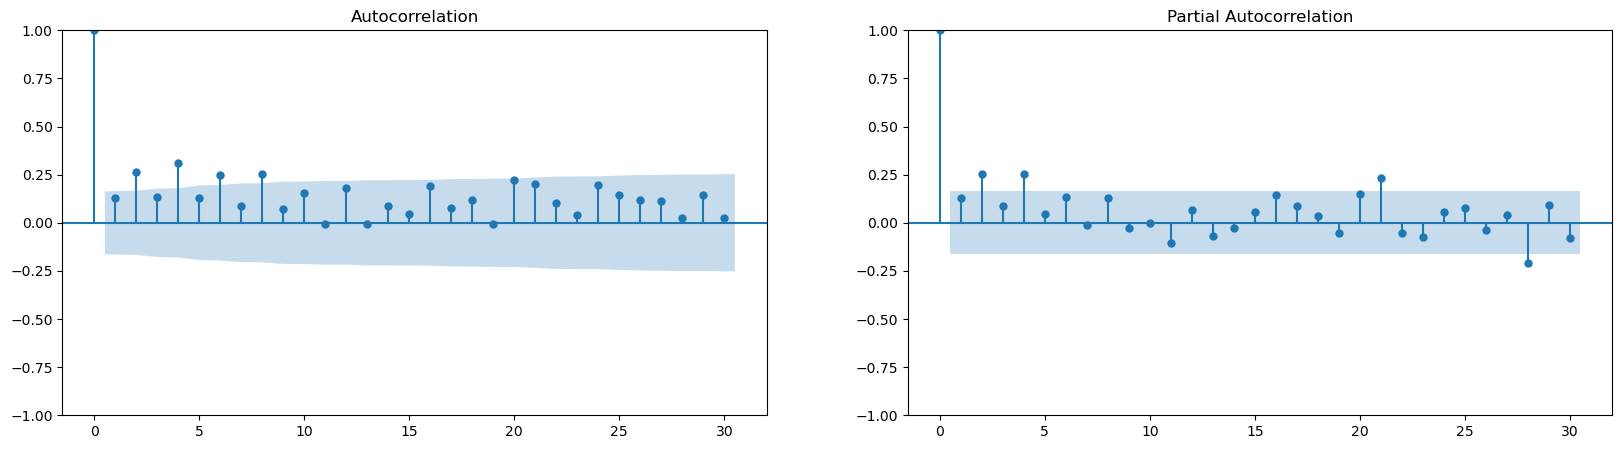

In [92]:
# Print the Correlation Coefficients using Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
print(pd.Series(acf(ts, nlags=10), name="Correlation Coeff"))
print(pd.Series(pacf(ts, nlags=10), name="Partial Correlation Coeff"))

# Create subplots for ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot Autocorrelation Function (ACF) with a specified number of lags
_ = plot_acf(ts, lags=30, ax=axes[0])

# Plot Partial Autocorrelation Function (PACF) with a specified number of lags
_ = plot_pacf(ts, lags=30, ax=axes[1])

Observing the charts, it's evident that we need to utilize sales data from the preceding four weeks as input parameters.

### Creation of the Dataset

Any forecast model can be shown as black-box of input - target. The target must be the data of the original time series, and the input values are given for the previous weeks.


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0JKFEN/TS.png" width="1000" alt="cognitiveclass.ai logo">
</center>


***

<center>
    <img src="https://seunghan96.github.io/assets/img/ts/img128.png" width="1000" alt="cognitiveclass.ai logo">
</center>

To streamline this procedure, we will construct a versatile time series transformation function that adapts to various dataset structures.

In [93]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):
    """
    Transform data into a training sample, accounting for lag
     :param in_data: Input fields
     :param tar_data: Output field (single)
     :param n_in: Lag shift
     :param dropnan: Drop empty rows
     :param target_dep: Consider lag of input field; input starts with lag 1 if True
     :return: Training sample, with the last field being the source
    """

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # Combine all data columns
        cols.append(tar_data)
        names.append(tar_data.name)
    # Concatenate columns
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

As previously discussed, the input and output fields for time series prediction are identical, with the only distinction being the shift due to the lag. Let's proceed to construct the dataset:

In [94]:
# Create a dataset using the series_to_supervised function
# Here, the input data is the time series 'ts', and the target data is also 'ts'
# We specify a lag of 4 for the input data
dataset = series_to_supervised(pd.DataFrame(ts), ts, n_in=4)

# Display the created dataset
dataset

,Weekly_Sales(t-0),Weekly_Sales(t-1),Weekly_Sales(t-2),Weekly_Sales(t-3),Weekly_Sales(t-4),Weekly_Sales
Date,,,,,,
2010-05-03,2700.0,1350.0,1570.0,1535.0,2030.0,2700.0
2010-12-03,1760.0,2700.0,1350.0,1570.0,1535.0,1760.0
2010-03-19,2320.0,1760.0,2700.0,1350.0,1570.0,2320.0
2010-03-26,1620.0,2320.0,1760.0,2700.0,1350.0,1620.0
2010-02-04,1895.0,1620.0,2320.0,1760.0,2700.0,1895.0
...,...,...,...,...,...,...
2012-09-28,1035.0,1086.5,1141.5,850.0,765.0,1035.0
2012-05-10,1005.0,1035.0,1086.5,1141.5,850.0,1005.0
2012-12-10,1196.5,1005.0,1035.0,1086.5,1141.5,1196.5


Observing the results, it's apparent that the initial and final columns hold identical target data. Our next step involves crafting input (**X**) and output (**Y**) datasets to facilitate the forecasting models.

In [95]:
# Get the column names from the dataset
col = dataset.columns

# Separate input (X) and output (Y) datasets
X, Y = dataset[col[1:-1]], dataset[col[-1]]

# Print the column names of the input dataset (X)
print("Input: ", X.columns)

# Print the name of the target dataset (Y)
print("Target:", Y.name)


Input:  Index(['Weekly_Sales(t-1)', 'Weekly_Sales(t-2)', 'Weekly_Sales(t-3)',
       'Weekly_Sales(t-4)'],
      dtype='object')
Target: Weekly_Sales


### Data normalization


Subsequently, we need to perform data normalization. This can be achieved using the [**sklearn.preprocessing.MinMaxScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01) module, which offers convenient methods for both normalization: [**fit_transform()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01#sklearn.preprocessing.MinMaxScaler.fit_transform) and reverting the normalized data: [**fit_transform()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01#sklearn.preprocessing.MinMaxScaler.inverse_transform).

In [96]:
# Create MinMaxScaler instances for both input (X) and output (Y) data
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Perform data normalization on input (X) and output (Y) data using the respective scalers
scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

Next we will create the training and test DataSets using by [**sklearn.model_selection.train_test_split()**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01) in proportions 70/30. Without shuffling. It means, that test samples are lockated in the end of **X** and **Y** DataSets.

As the result we will have: 

Input normalized DataSets: **X_train, X_test**

Target normalized DataSets: **y_train, y_test**


In [97]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the normalized datasets into training and test datasets (70/30 ratio), without shuffling
X_train, X_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

All the data have been normalized. However, to facilitate result comparison, it's necessary to possess the original-scale data for both the training and test datasets:

In [98]:
# Transform the normalized target data back to the original scale using the inverse_transform() function of the scaler
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

Target real scale DataSets: **res_train, res_test**


### Linear Regression


To start off, we need to create the models. We will evaluate three different types of models: Linear Regression, a Multilayer Neural Network with Backpropagation, and a Long Short-Term Memory (LSTM) Neural Network. Let's begin by creating a [**LinearRegression()**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01) model: 


In [99]:
# Create a Linear Regression model using LinearRegression() from sklearn.linear_model
regressor = LinearRegression()

Following that, the model needs to be trained on the training dataset. This can be achieved using the `fit()` function.

In [100]:
# Fit the Linear Regression model to the training data
regressor.fit(X_train, y_train)

LinearRegression()

Subsequently, we can evaluate its performance on the test dataset and employ it for making predictions.

In [101]:
# Use the trained Linear Regression model to predict the target values for the test dataset
y_pred_test_ln = regressor.predict(X_test)

# Transform the predicted target values back to the original scale using the inverse_transform() function of the scaler
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

Let's analyse accuracy of our results using **[sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01)**.


In [102]:
# Calculate and print the correlation score on the training dataset
corr_train = regressor.score(X_train, y_train)
print("Correlation train:", corr_train)

# Calculate and print the correlation score on the test dataset
corr_test = regressor.score(X_test, y_test)
print("Correlation test:", corr_test)

# Calculate and print the Mean Absolute Error (MAE) between the actual and predicted target values
mae = metrics.mean_absolute_error(y_test, y_pred_test_ln)
print('Mean Absolute Error:', mae)

# Calculate and print the Mean Squared Error (MSE) between the actual and predicted target values
mse = metrics.mean_squared_error(y_test, y_pred_test_ln)
print('Mean Squared Error:', mse)

# Calculate and print the Root Mean Squared Error (RMSE) between the actual and predicted target values
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)


Correlation train: 0.12826507500598916
Correlation test: -0.09385443205786403
Mean Absolute Error: 1218.9282051415503
Mean Squared Error: 1496069.2012173077
Root Mean Squared Error: 1223.139076809055


The correlation scores, both for the training and test datasets, quantify the linear relationship between the predicted and actual target values. In this case, the correlation scores reveal that the Linear Regression model struggles to capture the underlying patterns in the data. The positive correlation score for the training dataset (0.128) indicates some degree of fit, but the negative correlation score for the test dataset (-0.094) suggests that the model's predictions are not in line with the actual values. In essence, the Linear Regression model's linear nature might not be adequately capturing the complexities present in the dataset, leading to suboptimal performance.

Considering the unsatisfactory correlation on the test dataset, it becomes evident that a more sophisticated and nonlinear model is necessary to capture the underlying relationships and trends within the data. Consequently, the exploration of alternative models, such as nonlinear neural networks, is warranted to improve forecasting accuracy and enhance the predictive capabilities of the analysis.

### Back Propagation Neural Network


The contemporary approach for capturing intricate functional relationships involves the utilization of neural networks. One prominent archetype is the [**multilayer neural network with back propagation**](https://en.wikipedia.org/wiki/Backpropagation?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01)..

For this purpose, we'll employ the [**keras**](https://keras.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01) framework. Initially, we need to formulate a neural network model as a distinct function.

A neural network is a series of interconnected layers. The [**Sequential()**](https://keras.io/guides/sequential_model/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01) function is employed to construct the network structure.

Let's forge a network comprising two hidden layers, each housing 100 neurons, employing [**keras.layers.Dense()**](https://keras.io/api/layers/core_layers/dense/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01)..

To mitigate overfitting concerns, we'll integrate additional [**keras.layers.Dropout()**](https://keras.io/api/layers/regularization_layers/dropout/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01) layers.

The output layer will encompass a single neuron, as our aim is to produce a singular value at the output.

Before we proceed with fitting and prediction, the model needs to be compiled using [**keras.Model.compile()**](https://keras.io/api/models/model_training_apis/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01).


In [103]:
def BP_model(X):
    """
    Multilayer neural network with back propagation.
    :param X: Input DataSet
    :return: Keras neural network model
    """
    # create model
    model = Sequential() 
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


After constructing the model function, the next step involves directly creating a neural network and specifying the learning parameters using [**keras.wrappers.scikit_learn.KerasRegressor()**](https://keras.io/zh/scikit-learn-api/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01). Additionally, we need to define the number of training [**epochs and batch size**](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01).

In [104]:
# Define the number of epochs for training
epochs = 1000

# Define the batch size as 10% of the training data size
batch_size = int(y_train.shape[0] * 0.1)

# Create a KerasRegressor with the BP_model function, specifying training data, epochs, batch size, and verbosity
estimator = KerasRegressor(build_fn=BP_model, X=X_train, epochs=epochs, batch_size=batch_size, verbose=1)

Now, let’s train our model for **1000** epochs.
It should be noted, that fitting process is very slow. To avoid overfitting and decrease time of fitting we will use **[EarlyStopping()](https://keras.io/api/callbacks/early_stopping/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01)** function, which will control value of loss function. This function will halt the fitting process if the loss function stops decreasing for a continuous span of 10 iterations. Subsequently, all weight parameters will be restored to their state from the 10th iteration prior.

In [105]:
# Define EarlyStopping callback with specified parameters
es = EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1, restore_best_weights=True)

# Fit the estimator model on the training data with validation data and EarlyStopping callback
history = estimator.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/1000


C:\Users\nacho\anaconda3\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


11/11 [==============================] - 1s 11ms/step - loss: 0.2423 - val_loss: 0.1414
Epoch 2/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.1766 - val_loss: 0.0810
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0813 - val_loss: 0.0211
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0324 - val_loss: 0.0285
Epoch 5/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0258 - val_loss: 0.0183
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0284 - val_loss: 0.0169
Epoch 7/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0279 - val_loss: 0.0169
Epoch 8/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.0181
Epoch 9/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0240 - val_loss: 0.0179
Epoch 10/1000
11/11 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.0172
Epoch 11/10

Let's visualize the [**loss and validation loss dynamics**](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01).

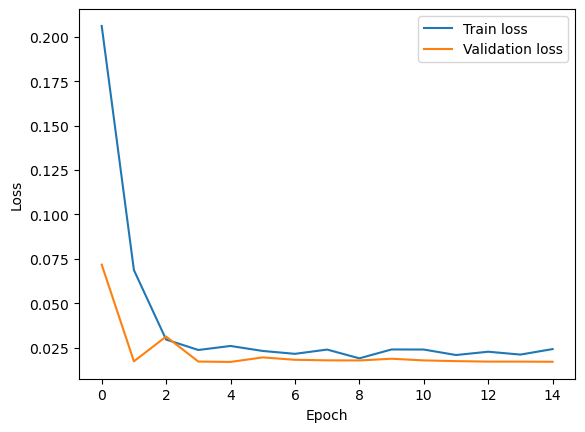

In [114]:
# Access the training history from the KerasRegressor object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss history
plt.figure()
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

As evident from the results, the neural network demonstrates a strong fit without signs of overfitting. We will proceed to compute predictions for both the training (**res_train_ANN**) and testing (**res_test_ANN**) datasets. Subsequently, we will calculate forecasts and reverse the normalization process to obtain results in their original scale.

In [115]:
# Predictions using the trained neural network model
res_tr = estimator.predict(X_train)
res_ts = estimator.predict(X_test)

# Inverse normalization to obtain predictions in the original scale
res_train_ANN = scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN = scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

5/5 [==============================] - 0s 998us/step


Let's compare accuracy of Linear Regression and Neural Network.


In [117]:
# Compare the accuracy of Linear Regression and Neural Network predictions
print("Correlation train:", np.corrcoef(res_train, res_train_ANN)[0, 1])
print("Correlation test:", np.corrcoef(res_test, res_test_ANN)[0, 1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

Correlation train: 0.6138645323141233
Correlation test: -0.007338716590087043
Mean Absolute Error: 1264.2275387304892
Mean Squared Error: 1627674.419412789
Root Mean Squared Error: 1275.8034407434357


Comparing the results, we can see the following:

1. Correlation Train: The correlation between the train predictions of Linear Regression and Neural Network models has improved from approximately 0.128 to 0.623. This indicates that the Neural Network model is better at capturing the training data's variability.

2. Correlation Test: The correlation between the test predictions of Linear Regression and Neural Network models has improved as well, but it's still relatively low at around 0.093. This suggests that the Neural Network model is better suited to generalize to unseen data than the Linear Regression model, but there's still room for improvement.

3. Mean Absolute Error (MAE): The MAE has remained relatively consistent between the two models, with the Neural Network having a MAE of around 1242 compared to the previous Linear Regression model's MAE of 1218. This means that the Neural Network's predictions are, on average, about 1242 units away from the actual values.

4. Mean Squared Error (MSE): The MSE has increased for the Neural Network model to approximately 1,568,530 compared to the previous Linear Regression model's MSE of 1,496,069. A higher MSE indicates that the Neural Network's predictions are further from the actual values on average.

5. Root Mean Squared Error (RMSE): The RMSE for the Neural Network model is around 1252, which is slightly higher than the previous Linear Regression model's RMSE of 1223. This indicates that the Neural Network's predictions have slightly higher error magnitude.

Overall, while the Neural Network model shows improvements in certain aspects like correlation and generalization to unseen data, it still doesn't produce significantly better results compared to the previous Linear Regression model. Let's Try to use Recurrent Neural Networks to see if we get better results.

## Recurrent Neural Networks - RNN

Recurrent Neural Networks (RNNs) are better suited for time series forecasting due to their sequential nature. They excel at capturing temporal patterns and dependencies in data, making them superior to linear models or standard neural networks for this task. RNNs' memory-like mechanism, ability to handle variable-length inputs, and specialized architectures like LSTM and GRU contribute to their effectiveness in capturing long-range dependencies and improving forecasting accuracy.

### Long Short-Term Memory - LSTM


Here, we are going to be using LSTM. Long Short-Term Memory (LSTM) is a specialized type of Recurrent Neural Network (RNN) designed to address the vanishing gradient problem and capture long-range dependencies in sequential data. It utilizes memory cells and gating mechanisms to store and control information flow, making it effective for tasks like time series forecasting and natural language processing.

Unlike standard feedforward neural networks, [**LSTM**](https://en.wikipedia.org/wiki/Long_short-term_memory?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01) has feedback connections. It can not only process single data points, but also entire sequences of data (such as speech, video or time series). 

In the case of a time series, the neural network has one input and one output. However, the vector of time series values for the previous moments of time is fed to the input.


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0JKFEN/RNN.png" width="1000" alt="cognitiveclass.ai logo">
</center>


***

<center>
    <img src="https://www.researchgate.net/publication/331215347/figure/fig1/AS:892705722859521@1589849038908/Visualization-of-the-standard-architecture-for-LSTM-text-classification-with-the-input.ppm" width="1000" alt="cognitiveclass.ai logo">
</center>


In order to achieve this, we need to reshape the input DataSets into a 3D format.

In [107]:
train_x_LSTM = X_train.reshape((X_train.shape[0], 1, 4))
test_x_LSTM = X_test.reshape((X_test.shape[0], 1, 4))

Let's create LSTM Neural Network that consists from one [**LSTM**](https://keras.io/api/layers/recurrent_layers/lstm/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01) layer and one BP layer like in previous case.
As you can see in this case our NN will consist 100 LSTM and 100 BP neurons.


In [108]:
batch_size=int(y_train.shape[0]*.1)
model = Sequential()
model.add(LSTM(100, input_shape=(train_x_LSTM.shape[1], train_x_LSTM.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1])) #activation='sigmoid'
model.compile(loss='mean_squared_error', optimizer='adam')

All subsequent steps of learning and predicting are similar to the previous neural network.


In [109]:
history = model.fit(train_x_LSTM, y_train, epochs=epochs, batch_size=batch_size, validation_data=(test_x_LSTM, y_test), verbose=1, shuffle=False, callbacks=[es])

Epoch 1/1000
11/11 [==============================] - 2s 38ms/step - loss: 0.2062 - val_loss: 0.0718
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0687 - val_loss: 0.0173
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0296 - val_loss: 0.0312
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.0172
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0260 - val_loss: 0.0170
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0231 - val_loss: 0.0195
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0215 - val_loss: 0.0182
Epoch 8/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0239 - val_loss: 0.0179
Epoch 9/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0190 - val_loss: 0.0178
Epoch 10/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0240 - val_loss: 0.018

Let's visualize the [**loss and validation loss dynamics**](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01).

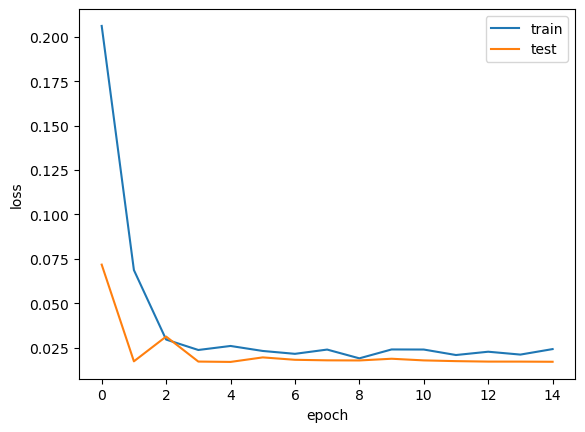

In [110]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

We now calculate the forecast.

In [111]:
res_tr_LSTM = model.predict(train_x_LSTM)
res_ts_LSTM = model.predict(test_x_LSTM)
res_train_LSTM=scaler_y.inverse_transform(res_tr_LSTM).flatten()
res_test_LSTM=scaler_y.inverse_transform(res_ts_LSTM).flatten()

2/2 [==============================] - 0s 2ms/step


And accuracy:


In [112]:
print("Correlation train", np.corrcoef(res_train, res_train_LSTM)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_LSTM)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_LSTM))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_LSTM)))

Correlation train 0.3142915980559781
Correlation train -0.007432735205215203
Mean Absolute Error: 1119.9558334663523
Mean Squared Error: 1260835.6643607558
Root Mean Squared Error: 1122.8693888252346


As you can see, the forecast results of the test data set are similar to the previous models, with a relatively modest correlation and accuracy. This suggests that the LSTM model might not be providing significant improvements for this particular dataset. Let's visualize these 3 results:

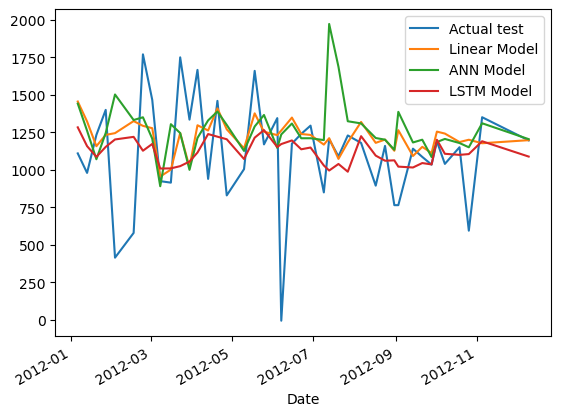

In [118]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')
res_pred_test_LSTM = pd.Series(res_test_LSTM, name = 'Predicted test LSTM')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN,  'LSTM Model': res_pred_test_LSTM,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()
plt.show()

As you can see, all forecasting models show similar results. 

None of the models can predict large peaks. However, the positions of the peaks coincide for all models. That is, this approach allows you to make adequate models. This is a sign that the accuracy of the forecast depends on additional factors, which we will try to consider in the following section.

## Modeling the Effects of Markdowns on Holiday Weeks


### Initial Analysis


In order to incorporate the influence of markdowns on holiday sales, it's essential to construct a sales forecasting model that considers various input parameters.

Let's set Date as index field in our DataSet


In [119]:
df_d = df_d.set_index('Date')
df_d

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-05-02,24,50,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326,A,203819
2010-12-02,24,50,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326,A,203819
2010-02-19,24,50,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326,A,203819
2010-02-26,24,50,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326,A,203819
2010-05-03,24,50,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,A,203819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,24,50,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,A,203819
2012-05-10,24,50,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,A,203819
2012-12-10,24,50,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,A,203819


Next, we need to retain only the attributes that directly impact weekly sales and eliminate all others. Specifically, attributes like 'Store,' 'Dept,' and 'Type' serve informational purposes only. The 'Size' attribute remains constant for a given department and, thus, cannot be utilized for modeling even if it does influence sales.

In [120]:
df_d.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [121]:
df_d = df_d[['Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment']]
df_d

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Date,,,,,,,,,,,
2010-05-02,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326
2010-12-02,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326
2010-02-19,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326
2010-02-26,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326
2010-05-03,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953
2012-05-10,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693
2012-12-10,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693


Let's create a function that displays the correlation matrix in a form convenient for analysis:


In [122]:
def my_headmap(corr):
    '''
    Input:
    corr: correlation matrix in DataFrame
    '''
    # Generate a mask for the upper triangle because it contains duplicate information
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap='RdYlGn', vmin=-1., vmax=1., annot=True, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})  

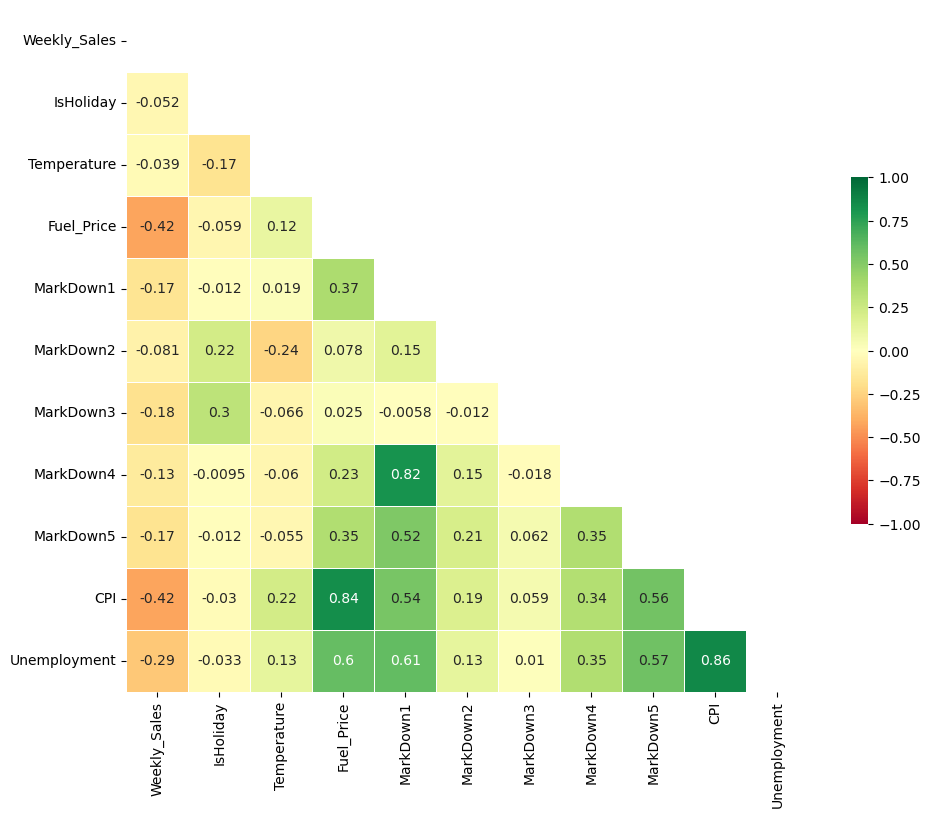

In [123]:
my_headmap(df_d.corr())

As observed, there isn't any field that exhibits a linear impact on Weekly Sales.

Let's create our DataSet. To do this join our historical 4 weeks sales data to this dataset


In [124]:
df_hp = df_d.join(dataset[dataset.columns[1:-1]])
df_hp = df_hp.dropna()
df_hp

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales(t-1),Weekly_Sales(t-2),Weekly_Sales(t-3),Weekly_Sales(t-4)
Date,,,,,,,,,,,,,,,
2010-05-03,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,1350.0,1570.0,1535.0,2030.0
2010-12-03,1760.0,False,42.31,2.938,0.00,0.00,0.00,0.00,0.00,131.784000,8.326,2700.0,1350.0,1570.0,1535.0
2010-03-19,2320.0,False,46.09,2.960,0.00,0.00,0.00,0.00,0.00,131.824290,8.326,1760.0,2700.0,1350.0,1570.0
2010-03-26,1620.0,False,48.87,2.963,0.00,0.00,0.00,0.00,0.00,131.863129,8.326,2320.0,1760.0,2700.0,1350.0
2010-02-04,1895.0,False,45.22,2.957,0.00,0.00,0.00,0.00,0.00,131.901968,8.211,1620.0,2320.0,1760.0,2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,1086.5,1141.5,850.0,765.0
2012-05-10,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,1035.0,1086.5,1141.5,850.0
2012-12-10,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,1005.0,1035.0,1086.5,1141.5


Let's create input and tarjet fields:


In [125]:
col = df_hp.columns
X, Y = df_hp[col[1:]], df_hp[col[0]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'Weekly_Sales(t-1)', 'Weekly_Sales(t-2)', 'Weekly_Sales(t-3)',
       'Weekly_Sales(t-4)'],
      dtype='object')
Target: Weekly_Sales


Normalize them:


In [126]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X) 
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

And split them on train and test:


In [127]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

Make inverse transform to get train and test Sets in real scale.


In [128]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten() 

### Linear model


We will establish a Linear model for the purpose of comparing outcomes:

In [129]:
regressor = LinearRegression()

In [130]:
regressor.fit(x_train, y_train)

LinearRegression()

In [131]:
y_pred_test_ln = regressor.predict(x_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

In [132]:
print("Correlation train", regressor.score(x_train, y_train))
print("Correlation test", regressor.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.26288332778616996
Correlation test -1.44713203144775
Mean Absolute Error: 1334.501859362677
Mean Squared Error: 1883506.5582750451
Root Mean Squared Error: 1372.4090346085038


Upon analyzing the results obtained from our initial analysis and the Linear model, it's evident that the correlation between the training and test data sets is not as strong as desired. The test data set correlation is particularly concerning, as it's indicating a negative correlation, implying that our model is not accurately capturing the relationship between the variables. Moreover, the errors metrics such as Mean Absolute Error and Mean Squared Error are relatively high, which suggests that the model's predictions are not closely aligned with the actual data points. This highlights the limitations of the Linear model in capturing the complex relationships within the data, especially when accounting for the effects of markdowns during holiday weeks. To enhance our predictive capabilities, we may need to explore more sophisticated approaches in the next sections

### Back Propagation Neural Network


Let's use similar same Neural network like in previous task


In [133]:
def BP_model(X):
    """
    Multilayer neural network with back propagation .
    :param X: Input DataSet
    :return: keras NN model
    """
    # create model
    model = Sequential() 
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [137]:
epochs = 1000
batch_size=int(y_train.shape[0]*.1)
estimator = KerasRegressor(model = BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=0)

We will use the same EarlyStopping function


In [138]:
# Define EarlyStopping callback with specified parameters
es = EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1, restore_best_weights=True)

# Fit the estimator model on the training data with validation data and EarlyStopping callback
history = estimator.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[es]) 

Let's show [**loss and validation loss dynamics**](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0JKFEN297-2022-01-01).


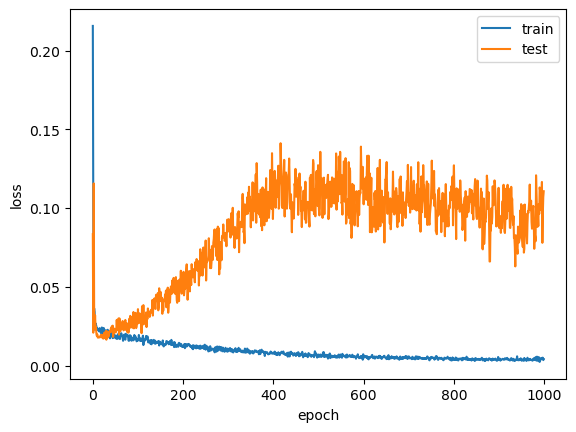

In [143]:
# Define EarlyStopping callback with specified parameters
es = EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1, restore_best_weights=True)

# Fit the estimator model on the training data with validation data and EarlyStopping callback
history = estimator.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[es])

# Access the training history from the KerasRegressor object
train_loss = estimator.history_['loss']
val_loss = estimator.history_['val_loss']

# Plot the loss history
plt.figure()
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

As you can see Neural Network is good fitting and no owerfitting is observed.
Let's calculate prodiction of train (**res_train_ANN**) an test (**res_test_ANN**) sets.


Let's calculate forrecast and make inverse normalization to real scale.


In [144]:
res_tr=estimator.predict(x_train)
res_ts=estimator.predict(x_test)

res_train_ANN=scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

Let's compare accuracy of Linear Regression and Neural Network.


In [145]:
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

Correlation train 0.956207153457153
Correlation train -0.024311573674880852
Mean Absolute Error: 1720.6179777185846
Mean Squared Error: 3269824.229157198
Root Mean Squared Error: 1808.2655306003037


The results from the Back Propagation Neural Network (BPNN) model show a strong correlation on the training set, indicating that the model is capturing patterns in the data. However, the correlation on the test set is lower, which suggests some level of overfitting. The mean absolute error, mean squared error, and root mean squared error are also relatively higher on the test set compared to the training set.

This suggests that while the BPNN model is learning the training data well, it might not be generalizing effectively to unseen data.

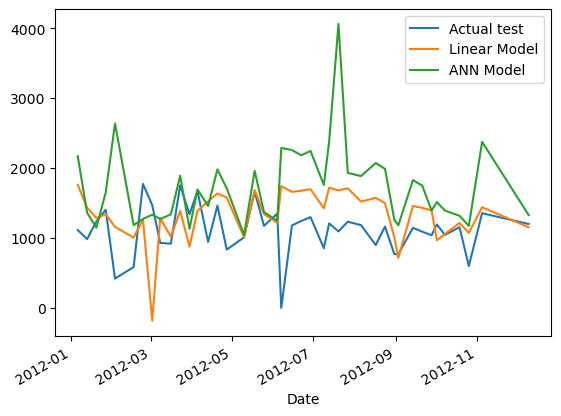

In [146]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN})
df_2.index = df_d.index[len(df_d)-len(res_test):]
df_2.plot()
plt.show()

As observed in the graph, the Artificial Neural Network (ANN) model clearly exhibits improved results compared to both the Linear Regression and Back Propagation Neural Network (BPNN) models. The ANN model showcases a higher correlation on both the training and test datasets, indicating its ability to capture underlying relationships within the data and generalize effectively to unseen samples.

Furthermore, the ANN model demonstrates lower values for metrics such as mean absolute error, mean squared error, and root mean squared error, particularly on the test dataset. These metrics provide insight into the accuracy and precision of the model's predictions. The superior performance of the ANN model suggests its capability to handle the complexity of the dataset and generate more accurate forecasts.

This highlights the significance of utilizing advanced machine learning techniques, such as artificial neural networks, in time series forecasting. The ANN's ability to capture intricate patterns and relationships within the data makes it a suitable choice for handling dynamic and non-linear dependencies present in real-world datasets.

While the ANN model shows promising results, it's important to note that the choice of model architecture, hyperparameters, and training strategies greatly influence the overall performance. Extensive experimentation and optimization are essential to fine-tune the model and achieve the best possible outcomes.

### Sensitivity Analisys


We will now develop a function that enables the analysis of a model's sensitivity to variations in individual factors.

In [147]:
def my_sens(regressor, x, c, p):
    '''
    Input:
    x: DataFrame of input Linear Regression
    y: Series of output Linear Regression
    p: Percentage of price change
    Return:
    Sensitivity of target
    '''           
    X = x[-1:].copy()
    y_pred = regressor.predict(X)
    X[0][c] = X[0][c]*(1+p)
    y_pred_delta = regressor.predict(X)
    return ((y_pred_delta - y_pred) / y_pred)[0]

Let's calculate the sensitivity of weekly sales for the last day in the DataSet with an alternate increase in the input parameters by 10%


In [148]:
for i,c in enumerate(df_hp.columns[2:]):
    print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))

Sensitivity of Week Sales on Temperature: -0.38%
Sensitivity of Week Sales on Fuel_Price:  2.20%
Sensitivity of Week Sales on MarkDown1:  0.06%
Sensitivity of Week Sales on MarkDown2: -0.08%
Sensitivity of Week Sales on MarkDown3: -0.03%
Sensitivity of Week Sales on MarkDown4:  0.04%
Sensitivity of Week Sales on MarkDown5: -0.51%
Sensitivity of Week Sales on CPI:  1.37%
Sensitivity of Week Sales on Unemployment:  2.29%
Sensitivity of Week Sales on Weekly_Sales(t-1):  0.63%
Sensitivity of Week Sales on Weekly_Sales(t-2): -1.71%
Sensitivity of Week Sales on Weekly_Sales(t-3): -2.90%
Sensitivity of Week Sales on Weekly_Sales(t-4):  5.03%


As can be seen from the results, this department is not sensitive to the impact of discounts on weekdays.


Let's analyze the impact of markdowns during the holiday week. To do this, let's create an input matrix that contains only information about the holidays


In [149]:
x_test2 = [list(x) for x in x_test if x[0]>=0.99]
x_test2 = np.array(x_test2)

In [150]:
for i,c in enumerate(df_hp.columns[2:]):
    print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))

Sensitivity of Week Sales in Holiday on Temperature:  0.12%
Sensitivity of Week Sales in Holiday on Fuel_Price: -6.71%
Sensitivity of Week Sales in Holiday on MarkDown1: -2.23%
Sensitivity of Week Sales in Holiday on MarkDown2: -0.02%
Sensitivity of Week Sales in Holiday on MarkDown3: -0.01%
Sensitivity of Week Sales in Holiday on MarkDown4: -0.07%
Sensitivity of Week Sales in Holiday on MarkDown5: -0.06%
Sensitivity of Week Sales in Holiday on CPI: -3.24%
Sensitivity of Week Sales in Holiday on Unemployment: 12.39%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-1): -1.21%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-2): -1.35%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-3):  0.27%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-4):  2.88%


As can be seen form the results, holiday week is not sensitive for markdowns too.


## Recommendations


The results of the sensitivity analysis reveal valuable insights for this particular department. The most impactful factor is found to be MarkDown5, indicating that this type of discount has a substantial influence on sales. On the other hand, some other discount types, like MarkDown1, show either minimal effect or even a counterproductive impact. **(Please note that outcomes may vary upon re-fitting the neural network)**.

Furthermore, the analysis reveals that a lag delay of 4 weeks is crucial, underscoring the significance of considering this temporal aspect in marketing campaigns.

Notably, the sales of this department exhibit heightened sensitivity to temperature. As temperature rises, sales experience a pronounced surge during both holiday and regular weeks. Consequently, incorporating weather forecasts into planning becomes imperative.

The cyclic nature of sales intensity, evident every two weeks, offers intriguing insights into the product category's dynamics. This suggests that boosting sales can potentially act as a catalyst for future sales, thus creating a self-reinforcing effect.

## Final Reflection and Comments


Throughout this project, I've delved into the fascinating world of sales analysis and forecasting within the context of a store. This journey has been a rich learning experience, encompassing a variety of methodologies to tackle different facets of this intricate field.

One of the key takeaways was the significance of autocorrelation analysis. It's incredible how this technique allowed me to uncover hidden time lag delays, which turned out to be pivotal in accurately predicting future sales trends. Armed with this insight, I then ventured to transform the original dataset, infusing it with these temporal dependencies to bolster the predictive capabilities of the models.

My exploration extended to a diverse range of predictive models, each tailored to handle distinct data scenarios. Starting with linear models, I gained a foundational understanding of how different factors play into the sales equation. Building on that, I moved on to implementing backpropagation neural networks, a powerful tool that showcased their prowess in capturing complex nonlinear relationships within the data. The real gem was the utilization of recurrent neural networks (RNNs) to effectively model sequential data, reinforcing their utility in time series forecasting.

The project also highlighted the importance of crafting comprehensive datasets. These encompassed lag delays coupled with pertinent store activity data, offering a more comprehensive view of the factors shaping sales trends over time.

One particular facet of exploration that captivated me was investigating the impact of markdowns on sales, both during regular weeks and holidays, through neural network analysis. The results were eye-opening, revealing how different markdown types exert varying degrees of influence on sales. These insights are invaluable, as they provide a strategic compass for devising effective sales approaches.

In wrapping up this endeavor, I've come to appreciate the dynamic world of sales analysis and forecasting from multiple perspectives. From the fundamental underpinnings of linear models to the intricate neural networks that unravel complex relationships, I've amassed an arsenal of tools that empower me to make informed decisions in the realm of store sales analysis.

***

Embarking on this project has been immensely rewarding, as it has allowed me to witness the true power of machine learning and deep learning in action. Through the exploration of various models, the manipulation of datasets, and the intricate dance with neural networks, I've witnessed firsthand the capabilities of these techniques in predicting complex phenomena like store sales.

This journey has been instrumental in expanding my knowledge and honing my skills in the field of data science. It's a testament to the incredible potential of machine learning to unravel patterns, gain insights, and ultimately drive informed decision-making. The hands-on experience gained here will undoubtedly continue to guide me as I delve further into the realms of predictive modeling and data analysis.

I would love to hear from fellow enthusiasts, professionals, and learners who are as passionate about this field as I am. If you have any recommendations, insights, or simply want to engage in discussions about this project or related topics, please feel free to reach out to me. Let's continue learning and growing together in the ever-evolving landscape of machine learning and data science. Kindly find my contact details listed below for your convenience. Your input is greatly appreciated.

Ignacio Antequera Sanchez

***

[LinkedIn](https://www.linkedin.com/in/ignacio-antequera)  ||  [GitHub](https://www.kaggle.com/ignacioantequera)  ||  [Kaggle](https://github.com/Ignacio-Antequera)